# Data Science NanoDegree Capstone 1

### Section Introduction - Business Understanding

#### Introduction and Problem Statement

This data set contains the match logs of active football/soccer players in the top 5 European Soccer Leagues in 2021/22 season. The dataset contains the performance stats of individual players in matches played across the 2021/22 season. The data dictionary of the dataset is in the next section.     

The project aims to provide a sytematic answer to identify best peforming players across the five leagues. Given that all players perform different functions across the field, it is better to divide into segments according to the roles. Mainly, we want to answer :-
a) The Best Performing Best Goalkeepers across top 5 European Soccer Leagues in footballing 2021/22 season

b) The Best Performing Best Centrebacks across top 5 European Soccer Leagues in footballing 2021/22 season

c) The Best Performing Best Midfielders(attacking attributes) across top 5 European Soccer Leagues in footballing 2021/22 season

d) The Best Performing Best Centre-Forward across top 5 European Soccer Leagues in footballing 2021/22 season

Not all roles priorities the same attributes or qualities, which the why the project will involve looking at each position and pick up some qualities that we think defines that position on the field. For example, a Centre-Forward should be rated based on their goal scoring records and how effective is their conversion rate i.e how many goals per attempt on goal. For the case of midfielders, it is very tricky to actually pick the "best" midfielders because each midfielder has different functional roles. In this project, we will demonstrate by focusing only on the attacking attributes of midfielders.   

The data set also consists of some null values which needs to be taken care of. Some additional features are added to create qualities that are found relevant and important (to a position). 

#### Data Dictionary

The dataset describes the matches played by any given player in the top 5 European leagues. It contains some non-technical stats like Date, Day, Venue, Result, Squad, Opponent, Minutes Played etc. We would like to describe some of the technical data columns.

Starting_Position : denotes the position that the player started as

Goals_Scored : the number of goals scored by the particular player

Assists : the number of passes that directly led to a goal

Yellow_Cards : the number of yellow card booking i.e warning received for bookable offences

Red_Cards : number of yellow card booking i.e sending off

No_of_Tackles : number of attempts to win the ball from another player

Interceptions : number of times a player managed to cut out the opposition pass

Own_Goals : number of goals scored past the own goal line

PK_Won : number of penalty kicks won

Touches : number of instances when the player touched the ball

Presses : number of times a player chased and closed down the opposition

Blocks : number of times a player managed to impede a pass or shot made by the opposition

Shot_Creating_Actions : number of times a player was involved in the last two actions leading to a shot

Goal_Creating_Actions :number of times a player was involved in the last two actions leading to a goal

Passes_Attempted : number of passes played by a player

Forward_Passes : number of successful passes played by a player

Feet_Carries : number times a player ran with the ball

Forward_Carries : number times a player ran with the ball, in the forward direction

Successful_Dribbles : number times a player successful go past an opposition player

Dribbles_Attempted : number times a player attempts go past an opposition player

Shots(exc_PK) : number of shots made 

Shots_on_Target(exc_PK) : number of shots made that are within the frame of the goalpost

In [1]:
# Importing libraries

In [2]:
import pandas as pd
import boto3 
import s3fs
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

### Section - Data Understanding

In [3]:
df_main = pd.read_csv("fbref_stats_2021_22_Five_European_Leagues.csv")

In [4]:
pd.set_option('display.max_columns', None)
df_main.head(6) 

,Date,Day,Competition,Round,Venue,Result,Squad,Opponent,Start,Starting_Position,Mins_Played,Goals_Scored,Assists,PK Attempted,Yellow_Cards,Red_Cards,Interceptions,Own_Goals,PK_Won,player_name_,Touches,Presses,No_of_Tackles,Blocks,Expected_Goals,NonPenalty_Expected_Goals,Expected_Assists,Shot_Creating_Actions,Goal_Creating_Actions,Passes_Completed,Passes_Attempted,Passes_Completed_%,Forward_Passes,Feet_Carries,Forward_Carries,Successful_Dribbles,Dribbles_Attempted,Shots(exc_PK),Shots_on_Target(exc_PK)
0,2022-05-06,Fri,Bundesliga,Matchweek 33,Home,W 2–1,Bochum,Arminia,N,FW,23,0,0,0,0,0,0,NaN,NaN,Jurgen Locadia,10,1,0,0,0.0,0.0,0.1,1,0,5,8,62.5,0,8,0,0,1,0,0
1,2021-09-12,Sun,Bundesliga,Matchweek 3,Home,D 0–0,Essen,Hoffenheim,N,"On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play",Ella Touon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"On matchday squad, but did not play","On matchday squad, but did not play"
2,2021-09-05,Sun,Bundesliga,Matchweek 2,Away,W 2–1,Essen,Leverkusen,N,NaN,1,0,0,0,0,0,NaN,0,NaN,Ella Touon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-28,Sat,Bundesliga,Matchweek 1,Home,D 1–1,Essen,Köln,N,"On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play","On matchday squad, but did not play",Ella Touon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"On matchday squad, but did not play","On matchday squad, but did not play"
4,2022-03-27,Sun,Bundesliga,Matchweek 18,Home,W 6–0,Hoffenheim,Carl-Zeiss Jena,Y,NaN,90,4,1,1,0,0,NaN,0,NaN,Nicole Billa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-04-23,Sat,Bundesliga,Matchweek 20,Home,L 1–2,Hoffenheim,Turbine Potsdam,N,NaN,18,0,0,0,0,0,NaN,0,NaN,Nicole Billa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75508 entries, 0 to 75507
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       75508 non-null  object
 1   Day                        75508 non-null  object
 2   Competition                75508 non-null  object
 3   Round                      75508 non-null  object
 4   Venue                      75508 non-null  object
 5   Result                     75508 non-null  object
 6   Squad                      75508 non-null  object
 7   Opponent                   75508 non-null  object
 8   Start                      75508 non-null  object
 9   Starting_Position          71231 non-null  object
 10  Mins_Played                75479 non-null  object
 11  Goals_Scored               75508 non-null  object
 12  Assists                    75508 non-null  object
 13  PK Attempted               75508 non-null  object
 14  Yellow

All the data are found to be of object type after loading.

In [6]:
df_main.isna().sum()

Date                             0
Day                              0
Competition                      0
Round                            0
Venue                            0
Result                           0
Squad                            0
Opponent                         0
Start                            0
Starting_Position             4277
Mins_Played                     29
Goals_Scored                     0
Assists                          0
PK Attempted                     0
Yellow_Cards                     0
Red_Cards                        0
Interceptions                 4246
Own_Goals                    69195
PK_Won                       73463
player_name_                     0
Touches                       6348
Presses                       6348
No_of_Tackles                 6348
Blocks                        6348
Expected_Goals                6348
NonPenalty_Expected_Goals     6348
Expected_Assists              6348
Shot_Creating_Actions         6348
Goal_Creating_Action

Some of the columns are found to to be containing null values. 

### Section - Prepare Data

#### Handling Missing Data

Except for 'Starting_Position' column the rest are measurement, which a null value will just represent a zero. For that we can thus convert all these to zeros.

In [7]:
df_main[df_main["Starting_Position"].isna()].head()

,Date,Day,Competition,Round,Venue,Result,Squad,Opponent,Start,Starting_Position,Mins_Played,Goals_Scored,Assists,PK Attempted,Yellow_Cards,Red_Cards,Interceptions,Own_Goals,PK_Won,player_name_,Touches,Presses,No_of_Tackles,Blocks,Expected_Goals,NonPenalty_Expected_Goals,Expected_Assists,Shot_Creating_Actions,Goal_Creating_Actions,Passes_Completed,Passes_Attempted,Passes_Completed_%,Forward_Passes,Feet_Carries,Forward_Carries,Successful_Dribbles,Dribbles_Attempted,Shots(exc_PK),Shots_on_Target(exc_PK)
2,2021-09-05,Sun,Bundesliga,Matchweek 2,Away,W 2–1,Essen,Leverkusen,N,NaN,1,0,0,0,0,0,NaN,0,NaN,Ella Touon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-27,Sun,Bundesliga,Matchweek 18,Home,W 6–0,Hoffenheim,Carl-Zeiss Jena,Y,NaN,90,4,1,1,0,0,NaN,0,NaN,Nicole Billa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-04-23,Sat,Bundesliga,Matchweek 20,Home,L 1–2,Hoffenheim,Turbine Potsdam,N,NaN,18,0,0,0,0,0,NaN,0,NaN,Nicole Billa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-05-08,Sun,Bundesliga,Matchweek 21,Away,W 1–0,Hoffenheim,Werder Bremen,Y,NaN,90,0,0,0,0,0,NaN,0,NaN,Nicole Billa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-05-15,Sun,Bundesliga,Matchweek 22,Home,D 3–3,Hoffenheim,Sand,Y,NaN,90,0,0,0,0,0,NaN,0,NaN,Nicole Billa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon examining, all these NaN in "Starting_Position" is probably due to missing data or probably a player is being substitued in, we can fill up as "Unknown" for the time being.

In [8]:
df_main["Starting_Position"] = df_main["Starting_Position"].fillna("Unknown")

As found in the previous section, all the columns loaded are of object type, so we want to convert those measurement columns to numerical columns and replacing the null with zeros. 

In [9]:
categorical_col = ["Date","Day","Competition","Round","Venue","Result","Squad","Opponent","Starting_Position","player_name_"]
numerical_col = df_main.drop(categorical_col , axis=1).columns

for i in numerical_col :
    df_main[i]=df_main[i].replace("Y",1)
    df_main[i]=df_main[i].replace("Y*",1)
    df_main[i]= df_main[i].replace("N",0)
    df_main[i]= df_main[i].replace("On matchday squad, but did not play",0)
    df_main[i]= df_main[i].astype(float)
    df_main[i]= df_main[i].fillna(0)

Re-check for null values

In [10]:
df_main.isna().sum()

Date                         0
Day                          0
Competition                  0
Round                        0
Venue                        0
Result                       0
Squad                        0
Opponent                     0
Start                        0
Starting_Position            0
Mins_Played                  0
Goals_Scored                 0
Assists                      0
PK Attempted                 0
Yellow_Cards                 0
Red_Cards                    0
Interceptions                0
Own_Goals                    0
PK_Won                       0
player_name_                 0
Touches                      0
Presses                      0
No_of_Tackles                0
Blocks                       0
Expected_Goals               0
NonPenalty_Expected_Goals    0
Expected_Assists             0
Shot_Creating_Actions        0
Goal_Creating_Actions        0
Passes_Completed             0
Passes_Attempted             0
Passes_Completed_%           0
Forward_

Great ! All null values have been removed.

 #### Feature Engineering

In order to perform analysis on each positions, we need to divide the main data set into smaller subcategories.

In [11]:
all_positions = []
for i in df_main.Starting_Position :
     all_positions = all_positions + i.split(",")
set(all_positions)        

{' but did not play',
 'AM',
 'CB',
 'CM',
 'DM',
 'FW',
 'GK',
 'LB',
 'LM',
 'LW',
 'On matchday squad',
 'RB',
 'RM',
 'RW',
 'Unknown',
 'WB'}

We can see that players are categorised as one or more of the positions above. In order to answer our questions regarding to the Best Goalkeeper, Best CentreBacks, Best Midfielder, and Best Forward, we need to classify the relevant positions into each subcategories. 

In [12]:
#goalkeepers would include all those classed as GK
df_gk = df_main[df_main.Starting_Position.str.contains("GK")]
#centrebacks would include all those classed as CB
df_cb = df_main[(df_main.Starting_Position.str.contains("CB"))]
#midfielders can cover anyone from Right Midfielder(RM), Left Midfielder(LM), Central Midfielder(RM), Right Winger(RW),
# Left Winger (LW), Attacking Midfielder (AM)
df_ma = df_main[(df_main.Starting_Position.str.contains("RM")) |
                (df_main.Starting_Position.str.contains("LM")) |  
                (df_main.Starting_Position.str.contains("LW")) |
                (df_main.Starting_Position.str.contains("AM")) |
                (df_main.Starting_Position.str.contains("CM")) |
                (df_main.Starting_Position.str.contains("RW"))]
#forwards would include all those classed as FW
df_fw = df_main[(df_main.Starting_Position.str.contains("FW"))]

In [13]:
#### Best Goalkeepers

In [14]:
#creating new features
df_gk["Clean_Sheet"] = (df_gk.Result.str.endswith("0") == True) *1 
df_gk["Goal_Conceded"] = df_gk["Result"].apply(lambda x: int(x[len(x)-1:]))
df_temp1 = df_main.groupby(["Competition","Round","Opponent"]).agg({'Shots_on_Target(exc_PK)':'sum'}).reset_index()
df_temp1 = df_temp1.rename(columns={"Opponent":"Squad"})

df_gk = pd.merge(df_gk,df_temp1,how='left',on=["Competition","Round","Squad"],suffixes = ["_For", "_Against"])
df_gk_grouped = df_gk.groupby(["player_name_","Squad","Competition"]).agg({'Clean_Sheet':'sum', 
                                   'Mins_Played': 'sum',
                                   "Goal_Conceded":'sum',
                                   "Shots_on_Target(exc_PK)_Against":'sum'}).reset_index()
#include only players played above 900 minutes
df_gk_grouped = df_gk_grouped[df_gk_grouped.Mins_Played > 90 *10]
df_gk_grouped["Goal_Conceded/Shots_Face"] = df_gk_grouped["Goal_Conceded"]/ df_gk_grouped["Shots_on_Target(exc_PK)_Against"]
df_gk_grouped = df_gk_grouped[df_gk_grouped["Shots_on_Target(exc_PK)_Against"]!=0]
df_gk_grouped["Goal_Conceded/per_90_mins"] = df_gk_grouped["Goal_Conceded"]/ df_gk_grouped["Mins_Played"].apply(lambda x : max(x,90))

df_gk_grouped["Clean_Sheet/Shots_Face"] = df_gk_grouped["Clean_Sheet"]/ df_gk_grouped["Shots_on_Target(exc_PK)_Against"]
df_gk_grouped["Clean_Sheet/per_90_mins"] = df_gk_grouped["Clean_Sheet"]/ df_gk_grouped["Mins_Played"].apply(lambda x : max(x,90))


## GETTING THE MIN AND MAX OF THE METRICS, TO BE USED FOR DENOMINATOR OF SCORING
min_Goal_Conceded_per_90_mins = df_gk_grouped["Goal_Conceded/per_90_mins"].min()
max_Clean_Sheet_per_90_mins = df_gk_grouped["Clean_Sheet/per_90_mins"].max()

min_Goal_Conceded_ratio = df_gk_grouped["Goal_Conceded/Shots_Face"].min()
max_Clean_Sheet_ratio = df_gk_grouped["Clean_Sheet/Shots_Face"].max()

C:\Users\geque\AppData\Local\Temp\ipykernel_13000\3628890377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gk["Clean_Sheet"] = (df_gk.Result.str.endswith("0") == True) *1
C:\Users\geque\AppData\Local\Temp\ipykernel_13000\3628890377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gk["Goal_Conceded"] = df_gk["Result"].apply(lambda x: int(x[len(x)-1:]))


In [15]:
#### Best Centrebacks

In [16]:
df_temp1 = df_main.groupby(["Competition","Round","Opponent"]).agg({'Shots(exc_PK)':'sum'}).reset_index()
df_temp2 = df_main.groupby(["Competition","Round","Opponent"]).agg({'Goals_Scored':'sum'}).reset_index()
df_temp1 = df_temp1.rename(columns={"Opponent":"Squad"})
df_temp2 = df_temp2.rename(columns={"Opponent":"Squad"})

df_cb = pd.merge(df_cb,df_temp1,how='left',on = ["Competition","Round","Squad"],
                 suffixes = ["_For", "_Against"])
df_cb["Prorated_Shots(exc_PK)_Against"] = df_cb["Shots(exc_PK)_Against"] * df_cb["Mins_Played"]/90

df_cb = pd.merge(df_cb,df_temp2,how='left',on=["Competition","Round","Squad"],suffixes = ["_For", "_Against"])

df_cb_grouped = df_cb.groupby(["player_name_","Squad","Competition"]).agg({ 
                                                             'Mins_Played': 'sum',
                                                             'No_of_Tackles':'sum',
                                                             'Blocks':'sum',
                                                             'Interceptions':'sum',
                                                             'Yellow_Cards':'sum',
                                                             'Prorated_Shots(exc_PK)_Against':"sum",
                                                             'Goals_Scored_Against':"sum"
                                                            }).reset_index()
#include only players played above 900 minutes only
df_cb_grouped = df_cb_grouped[df_cb_grouped.Mins_Played > 90 *10]


df_cb_grouped = df_cb_grouped[df_cb_grouped["Prorated_Shots(exc_PK)_Against"]!=0]
df_cb_grouped["No_of_Tackles_ratio"] = df_cb_grouped["No_of_Tackles"]/ df_cb_grouped["Prorated_Shots(exc_PK)_Against"]
df_cb_grouped["Blocks_ratio"] = df_cb_grouped["Blocks"]/ df_cb_grouped["Prorated_Shots(exc_PK)_Against"]
df_cb_grouped["Interceptions_ratio"] = df_cb_grouped["Interceptions"]/ df_cb_grouped["Prorated_Shots(exc_PK)_Against"]
df_cb_grouped["Yellow_Cards_ratio"] = df_cb_grouped["Yellow_Cards"]/ df_cb_grouped["Prorated_Shots(exc_PK)_Against"]
df_cb_grouped["Goals_Scored_Against_per90"] = df_cb_grouped["Goals_Scored_Against"]/ df_cb_grouped["Mins_Played"].apply(lambda x : max(x,90))
## GETTING THE MIN AND MAX OF THE METRICS, TO BE USED FOR DENOMINATOR OF SCORING
max_No_of_Tackles_ratio = df_cb_grouped["No_of_Tackles_ratio"].max()
max_Blocks_ratio = df_cb_grouped["Blocks_ratio"].max()
max_Interceptions_ratio = df_cb_grouped["Interceptions_ratio"].max()
min_Yellow_Cards_ratio = df_cb_grouped["Yellow_Cards_ratio"].min()
min_Goals_Scored_Against_per90 = df_cb_grouped["Goals_Scored_Against_per90"].min()

In [17]:
#### Best Midfielders(attacking)

In [18]:
df_ma_grouped = df_ma.groupby(["player_name_","Squad","Competition"]).agg({ 
                                                             'Mins_Played': 'sum',
                                                             "Passes_Completed":'sum',
                                                             'Assists':'sum',
                                                             'Shot_Creating_Actions':'sum',
                                                             'Goal_Creating_Actions':'sum'
                                                            }).reset_index()
#include only players played above 900 minutes only
df_ma_grouped = df_ma_grouped[df_ma_grouped.Mins_Played > 90 *10]
df_ma_grouped["Passes_Completed_per_90_mins"] = df_ma_grouped["Passes_Completed"]/ df_ma_grouped["Mins_Played"].apply(lambda x : max(x,90))
df_ma_grouped["Assists_per_90_mins"] = df_ma_grouped["Assists"]/ df_ma_grouped["Mins_Played"].apply(lambda x : max(x,90))
df_ma_grouped["Shot_Creating_Actions_per_90_mins"] = df_ma_grouped["Shot_Creating_Actions"]/ df_ma_grouped["Mins_Played"].apply(lambda x : max(x,90))
df_ma_grouped["Goal_Creating_Actions_per_90_mins"] = df_ma_grouped["Goal_Creating_Actions"]/ df_ma_grouped["Mins_Played"].apply(lambda x : max(x,90))

## GETTING THE MIN AND MAX OF THE METRICS
max_Passes_Completed_per_90_mins = df_ma_grouped["Passes_Completed_per_90_mins"].max()
max_Assists_per_90_mins = df_ma_grouped["Assists_per_90_mins"].max()
max_Shot_Creating_Actions_per_90_mins = df_ma_grouped["Shot_Creating_Actions_per_90_mins"].max()
max_Goal_Creating_Actions_per_90_mins = df_ma_grouped["Goal_Creating_Actions_per_90_mins"].max()

In [19]:
#### Best Forwards

In [20]:
df_fw_grouped = df_fw.groupby(["player_name_","Squad"]).agg({ 
                                                             'Mins_Played': 'sum',
                                                             "Goals_Scored":'sum',
                                                             'Shots(exc_PK)':'sum',
                                                             'Shot_Creating_Actions':'sum',
                                                             'Goal_Creating_Actions':'sum',
                                                             'NonPenalty_Expected_Goals' :"sum",
                                                            }).reset_index()

df_fw_grouped = df_fw_grouped[df_fw_grouped.Mins_Played > 90 *10]
df_fw_grouped = df_fw_grouped[df_fw_grouped["Shots(exc_PK)"]!=0]

df_fw_grouped["Goals_Scored_Above_Expected_Goal_per_90_mins"] = (df_fw_grouped["Goals_Scored"] - df_fw_grouped["NonPenalty_Expected_Goals"])/df_fw_grouped["Mins_Played"].apply(lambda x : max(x,90))
df_fw_grouped["Goals_Scored_per_90_mins"] = df_fw_grouped["Goals_Scored"]/ df_fw_grouped["Mins_Played"].apply(lambda x : max(x,90))
df_fw_grouped["Precision"] =  df_fw_grouped["Goals_Scored"]/ df_fw_grouped["Shots(exc_PK)"]
df_fw_grouped["Shot_Creating_Actions_per_90_mins"] = df_fw_grouped["Shot_Creating_Actions"]/ df_fw_grouped["Mins_Played"].apply(lambda x : max(x,90)) 
df_fw_grouped["Goal_Creating_Actions_per_90_mins"] = df_fw_grouped["Goal_Creating_Actions"]/ df_fw_grouped["Mins_Played"].apply(lambda x : max(x,90)) 
## GETTING THE MIN AND MAX OF THE METRICS
max_Goals_Scored_Above_Expected_Goal_per_90_mins = df_fw_grouped["Goals_Scored_Above_Expected_Goal_per_90_mins"].max()
max_Goals_Scored_per_90_mins = df_fw_grouped["Goals_Scored_per_90_mins"].max()
max_Precision = df_fw_grouped["Precision"].max()
max_Shot_Creating_Actions_per_90_mins = df_fw_grouped["Shot_Creating_Actions_per_90_mins"].max()
max_Goal_Creating_Actions_per_90_mins = df_fw_grouped["Goal_Creating_Actions_per_90_mins"].max()


In [21]:
### Section - Model Data

In [22]:
df_gk_grouped["Non_Normalised_GK_Scoring"] = (((1-df_gk_grouped["Goal_Conceded/per_90_mins"])/(1-min_Goal_Conceded_per_90_mins)) \
                        + (df_gk_grouped["Clean_Sheet/per_90_mins"] /max_Clean_Sheet_per_90_mins))*10/2


df_gk_grouped["Normalised_GK_Scoring"] = (((1-df_gk_grouped["Goal_Conceded/Shots_Face"])/(1-min_Goal_Conceded_ratio)) \
                        + (df_gk_grouped["Clean_Sheet/Shots_Face"] /max_Clean_Sheet_ratio))*10/2

df_gk_grouped = df_gk_grouped.sort_values("Normalised_GK_Scoring", ascending = False)


In [23]:
df_cb_grouped["CB_Scoring"] = ((df_cb_grouped["No_of_Tackles_ratio"] /max_No_of_Tackles_ratio) \
                            + (df_cb_grouped["Blocks_ratio"] /max_Blocks_ratio) \
                            + (df_cb_grouped["Interceptions_ratio"] /max_Interceptions_ratio) \
                            + ((1-df_cb_grouped["Yellow_Cards_ratio"]) /(1-min_Yellow_Cards_ratio ))
                            +  (1- df_cb_grouped["Goals_Scored_Against_per90"]) /(1-min_Goals_Scored_Against_per90)  
                              )*10/5

df_cb_grouped = df_cb_grouped.sort_values("CB_Scoring", ascending = False)


In [24]:
df_ma_grouped["MA_Scoring"] = (
                            +(df_ma_grouped["Assists_per_90_mins"] /max_Assists_per_90_mins) \
                            + (df_ma_grouped["Shot_Creating_Actions_per_90_mins"] /max_Shot_Creating_Actions_per_90_mins) \
                            + (df_ma_grouped["Goal_Creating_Actions_per_90_mins"] /max_Goal_Creating_Actions_per_90_mins) \
                              )*10/4

df_ma_grouped = df_ma_grouped.sort_values("MA_Scoring", ascending = False)

In [25]:
df_fw_grouped["FW_Scoring"] = ((df_fw_grouped["Goals_Scored_per_90_mins"]/max_Goals_Scored_per_90_mins) \
                            + (df_fw_grouped["Goals_Scored_Above_Expected_Goal_per_90_mins"]/max_Goals_Scored_Above_Expected_Goal_per_90_mins) \
                            +(df_fw_grouped["Precision"] /max_Precision) \
                              )*10/3

df_fw_grouped = df_fw_grouped.sort_values("FW_Scoring", ascending = False)

### Section - Results

### Tabular

In [26]:
#### Best Goalkeepers

In [27]:
df_gk_grouped[["player_name_","Squad","Normalised_GK_Scoring"]].head(10)

,player_name_,Squad,Normalised_GK_Scoring
45,Ederson,Manchester City,9.108688
11,Alisson,Liverpool,8.903509
137,Mike Maignan,Milan,8.198454
7,Alex Remiro,Real Sociedad,7.881994
179,Thibaut Courtois,Real Madrid,7.380964
196,Yassine Bounou,Sevilla,7.295624
61,Geronimo Rulli,Villarreal,7.254486
36,David Ospina,Napoli,7.158684
166,Samir Handanovic,Inter,7.109921
47,Edouard Mendy,Chelsea,7.052173


In [28]:
#### Best Centrebacks

In [29]:
df_cb_grouped[["player_name_","Squad","CB_Scoring"]].head(10)

,player_name_,Squad,CB_Scoring
361,Jose Luis Palomino,Atalanta,9.200585
269,Gleison Bremer,Torino,8.897385
294,Igor,Fiorentina,8.756599
430,Luan Peres Petroni,Marseille,8.693344
721,Trevoh Chalobah,Chelsea,8.478731
199,Emre Can,Dortmund,8.393741
338,Joel Matip,Liverpool,8.313095
706,Thiago Silva,Chelsea,8.294406
609,Pierre Kalulu,Milan,8.201211
368,Josko Gvardiol,RB Leipzig,8.189761


In [30]:
#### Best Midfielders(attacking)

In [31]:
df_ma_grouped[["player_name_","Squad","MA_Scoring"]].head(10)

,player_name_,Squad,MA_Scoring
1250,Ousmane Dembele,Barcelona,7.009160
491,Florian Wirtz,Leverkusen,6.393050
1544,Thomas Muller,Bayern Munich,6.127708
936,Lionel Messi,Paris S-G,5.954612
362,Dimitri Payet,Marseille,5.582031
515,Gabriel Jesus,Manchester City,5.550923
331,Dejan Kulusevski,Tottenham,5.319369
1605,Vinicius Junior,Real Madrid,5.253212
576,Hakan Calhanoglu,Inter,5.236511
1187,Neymar,Paris S-G,5.229029


In [32]:
#### Best Forwards

In [33]:
df_fw_grouped[["player_name_","Squad","FW_Scoring"]].head(10)

,player_name_,Squad,FW_Scoring
893,Wissam Ben Yedder,Monaco,8.029951
252,Erling Haaland,Dortmund,7.473573
460,Karim Benzema,Real Madrid,6.842507
697,Patrik Schick,Leverkusen,6.834978
339,Hugo Ekitike,Reims,6.673652
217,Dusan Vlahovic,Fiorentina,6.606102
156,Ciro Immobile,Lazio,6.580969
710,Pierre Emerick Aubameyang,Barcelona,6.409855
15,Alberth Elis,Bordeaux,6.332450
768,Sadio Mane,Liverpool,6.080742


### Graphical

In [34]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

In [35]:
#### Best Goalkeepers

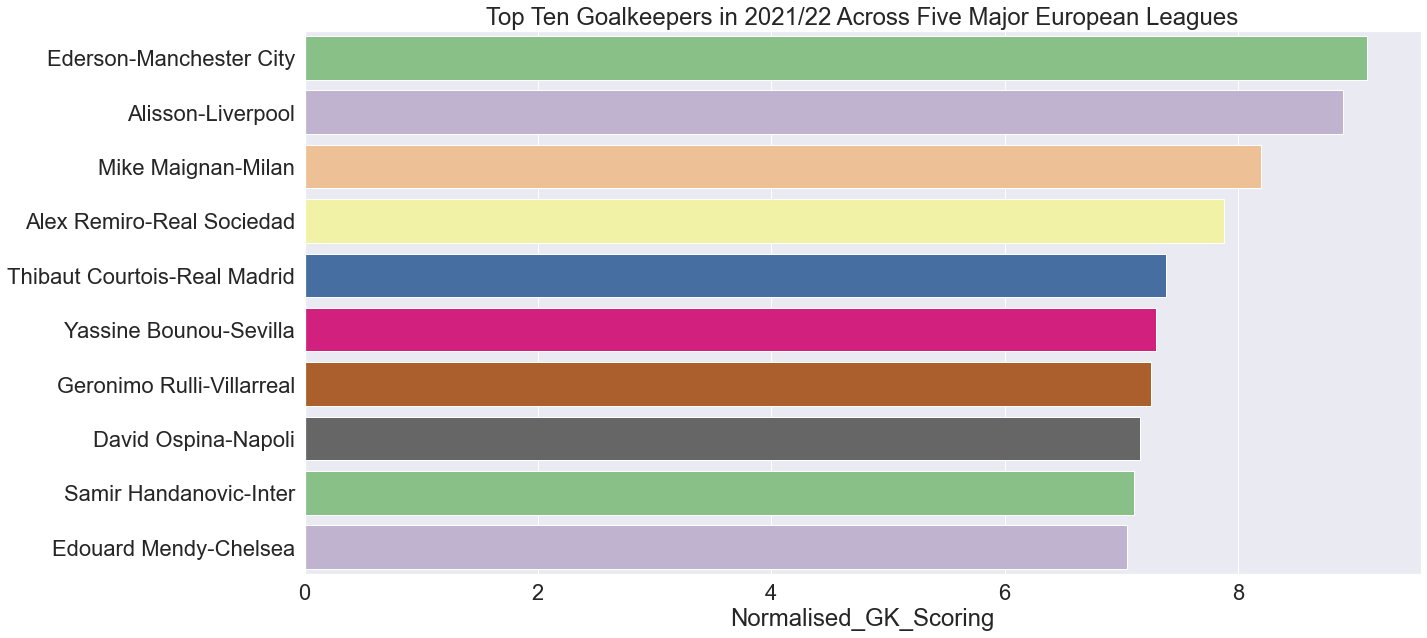

In [36]:
X = df_gk_grouped["player_name_"][0:10] + "-" + df_gk_grouped["Squad"][0:10]
Y = df_gk_grouped["Normalised_GK_Scoring"][0:10]
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.barplot(x=Y, y=X,
               data=df_gk_grouped, palette="Accent").set(title='Top Ten Goalkeepers in 2021/22 Across Five Major European Leagues')

In [37]:
#### Best Centrebacks

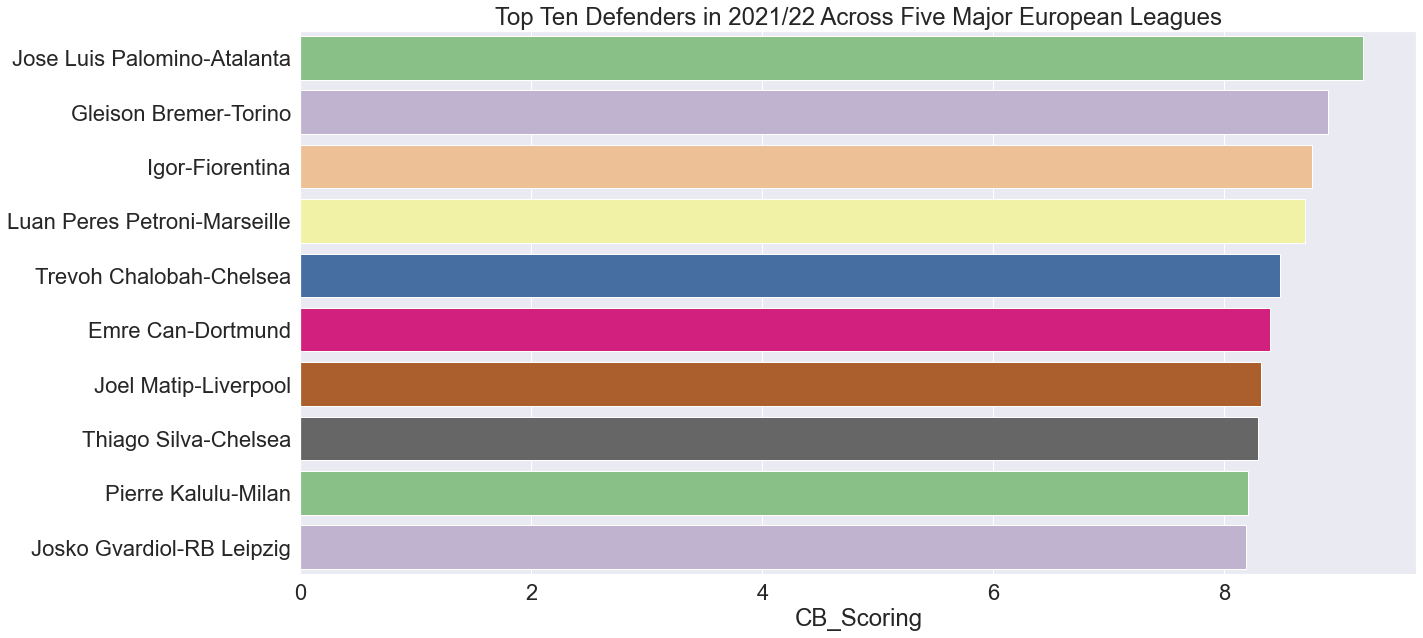

In [38]:
X = df_cb_grouped["player_name_"][0:10] + "-" + df_cb_grouped["Squad"][0:10]
Y = df_cb_grouped["CB_Scoring"][0:10]
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.barplot(x=Y, y=X,
               data=df_cb_grouped, palette="Accent").set(title='Top Ten Defenders in 2021/22 Across Five Major European Leagues')

In [39]:
#### Best Midfielders(attacking)

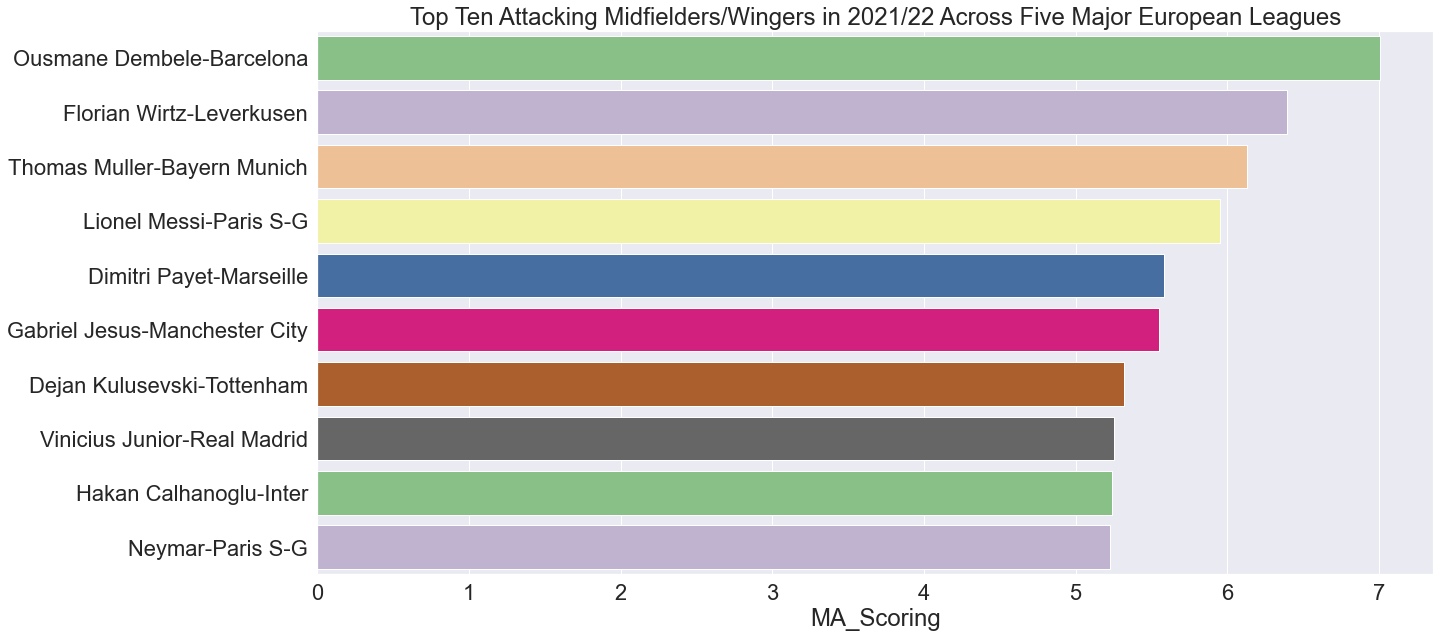

In [40]:
X = df_ma_grouped["player_name_"][0:10] + "-" + df_ma_grouped["Squad"][0:10]
Y = df_ma_grouped["MA_Scoring"][0:10]
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.barplot(x=Y, y=X,
               data=df_fw_grouped, palette="Accent").set(title='Top Ten Attacking Midfielders/Wingers in 2021/22 Across Five Major European Leagues')

In [41]:
#### Best Forwards

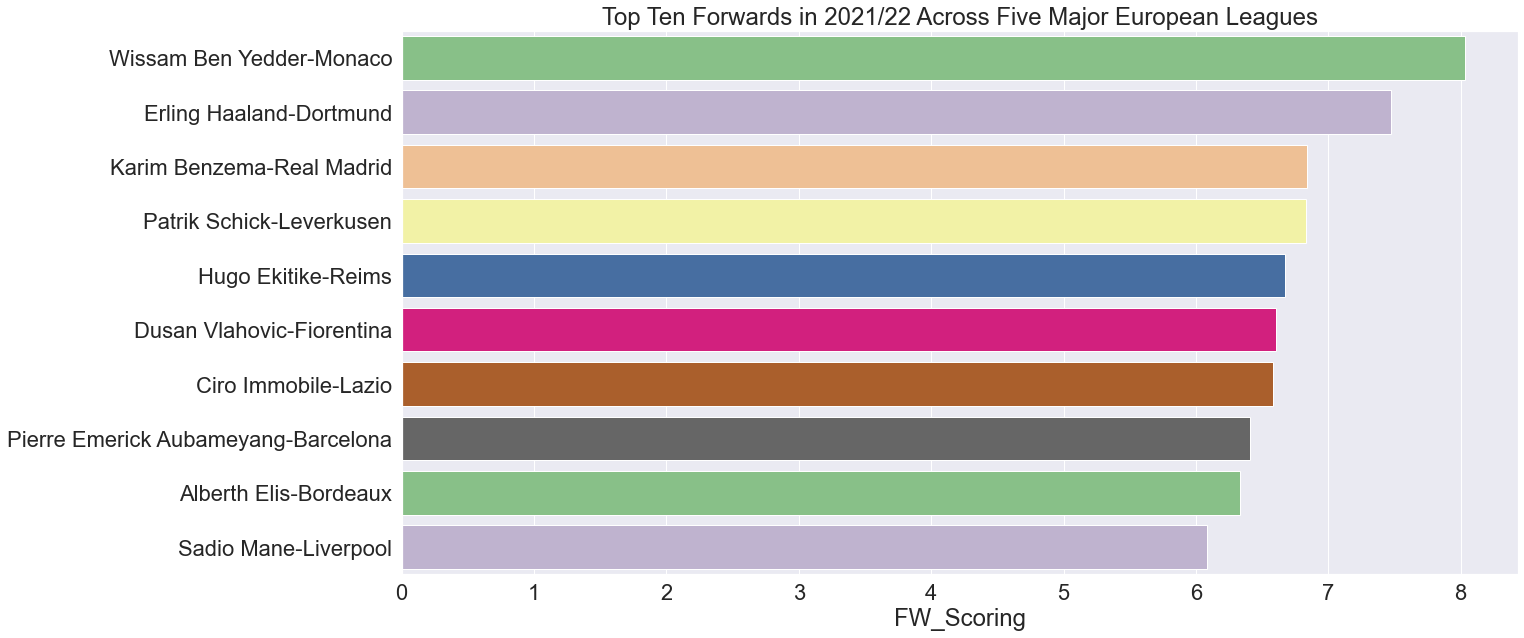

In [42]:
X = df_fw_grouped["player_name_"][0:10] + "-" + df_fw_grouped["Squad"][0:10]
Y = df_fw_grouped["FW_Scoring"][0:10]
fig, ax = plt.subplots(figsize=(20,10))
ax=sns.barplot(x=Y, y=X,
               data=df_fw_grouped, palette="Accent").set(title='Top Ten Forwards in 2021/22 Across Five Major European Leagues')